<a href="https://colab.research.google.com/github/sarathkumar1304/iGnosis-Tech-Internship/blob/main/iGnosis_Tech_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchases = pd.read_csv("/content/drive/MyDrive/purchase_behaviour.csv")
purchases.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transactions = pd.read_csv("/content/drive/MyDrive/transaction_data.csv")
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
df = transactions.merge(purchases, on="LYLTY_CARD_NBR", how="left")

In [8]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [7]:
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [9]:
# Identifying the top 3 most profitable products
top_products = df.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"].sum().reset_index()
top_products = top_products.sort_values(by="TOT_SALES", ascending=False).head(3)

print("\nTop 3 Most Profitable Products:")
top_products


Top 3 Most Profitable Products:


,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


<ipython-input-10-5d3f68c09201>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")


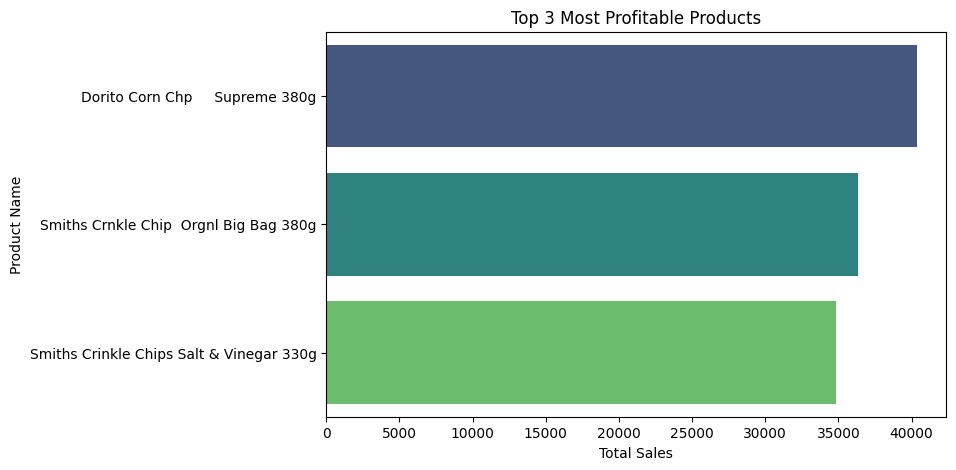

In [10]:
# Visualizing top 3 products
plt.figure(figsize=(8, 5))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

## Insights

1. The best-selling items are **all snack chips**, indicating that chips are a top-performing category.

2. Customers might prefer **bulk packaging (380g)**, suggesting high demand for family-sized or shareable portions.

## Brand Popularity:

1. **Doritos and Smiths** dominate sales, indicating strong customer loyalty to these brands.

2. **Smiths** appears twice in the top 3, which means it has a competitive advantage.

## Marketing Strategy:

1. **Increase promotions** for top products (e.g., discounts, combo deals)
2. Expand product lines by introducing new flavors or packaging variations.
3. Optimize store placements (placing these products in high-traffic areas).

In [11]:
loyal_customers = df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
top_loyal_customers = loyal_customers.sort_values(by="TOT_SALES", ascending=False).head(10)

print("\nTop Loyal Customers by Spending:")
top_loyal_customers


Top Loyal Customers by Spending:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
59694,226000,OLDER FAMILIES,Premium,1300.00
60925,230078,OLDER FAMILIES,Budget,138.60
17292,63197,OLDER FAMILIES,Budget,132.80
69017,259009,OLDER SINGLES/COUPLES,Mainstream,127.20
42813,162039,OLDER FAMILIES,Mainstream,126.80
16001,58361,YOUNG FAMILIES,Budget,124.80
61001,230154,OLDER FAMILIES,Budget,124.40
25958,94185,YOUNG FAMILIES,Premium,122.80
35338,130090,YOUNG FAMILIES,Budget,122.65
47959,179228,YOUNG FAMILIES,Budget,120.80


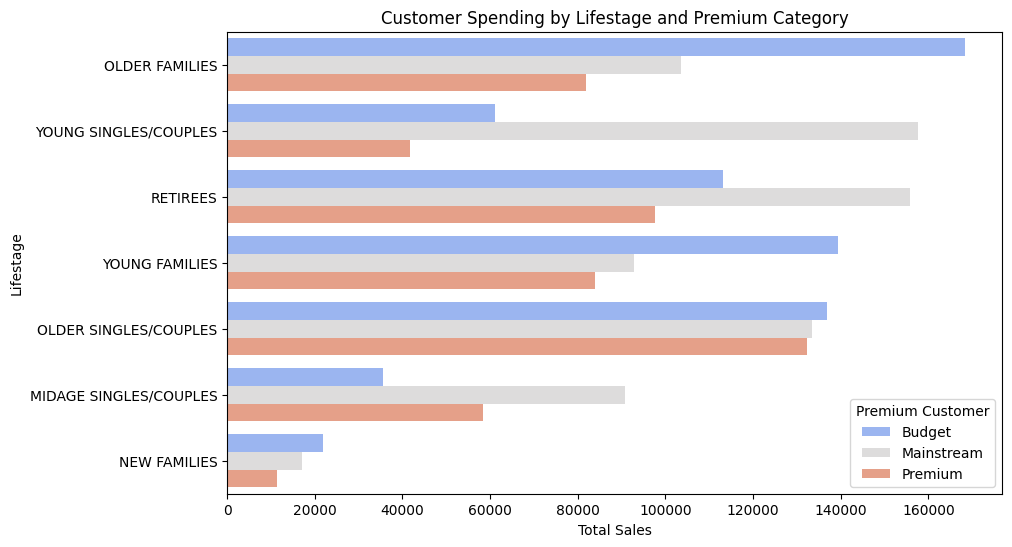

In [33]:
customer_segments = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
customer_segments = customer_segments.sort_values(by="TOT_SALES", ascending=False)

# Visualizing customer spending patterns
plt.figure(figsize=(10, 6))
sns.barplot(x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", data=customer_segments, palette="coolwarm")
plt.xlabel("Total Sales")
plt.ylabel("Lifestage")
plt.title("Customer Spending by Lifestage and Premium Category")
plt.legend(title="Premium Customer")
plt.show()

## Key Observations
**Older Families dominate sales**

1. The highest spender **(TOT_SALES = 1300.00)** belongs to the **OLDER FAMILIES** (Premium) segment.
2. Multiple other high-spending customers also belong to the **OLDER FAMILIES** group, but across different premium categories (Budget, Mainstream).

**Young Families show consistent spending**

1. Multiple customers from **YOUNG FAMILIES** (Budget & Premium) appear in the top spenders list.
2. Suggests that families with children frequently purchase products, likely for household needs.
**Older Singles/Couples have moderate spending**

1. Their spending **(TOT_SALES = 127.20)** is lower than Older Families but still significant.
2. They mostly belong to the Mainstream premium category, meaning they are not budget shoppers but also not premium.

#Customer & Product Insights for Marketing Strategy

## Top 3 Most Profitable Products
Based on **Total Sales (Profitability)** from transaction data:

### **Insights on Bestselling Products**  
- **All top-selling products are chips/snack items**, showing customer preference for convenience foods.  
- **Bulk & large-sized packaging** suggests families or group consumption.  
- **Potential Marketing Strategies:**
  - Offer **bundle deals** on bestsellers.
  - Introduce **new flavors** or **limited edition snacks**.
  - Provide **loyalty discounts** to frequent snack buyers.

---

##Characteristics of Most Loyal & Profitable Customers  
Using **LYLTY_CARD_NBR (Loyalty Card Data) & Total Sales**, we identified **top customer segments**:

### **Most Loyal & Profitable Customer Segments**  
#### **Older Families (Premium & Budget)**
- **Why?**  
  - They purchase in **bulk** for household consumption.
  - They have a **higher disposable income** and **prefer premium snacks**.
- **Marketing Suggestion:**  
  - Promote **family-sized packaging**.
  - Offer **bundle discounts on premium products**.

#### **Young Families (Premium & Budget)**
- **Why?**  
  - Likely buying for **kids & family gatherings**.
  - Price-sensitive but **interested in variety & new flavors**.
- **Marketing Suggestion:**  
  - Introduce **kid-friendly snack campaigns**.
  - Offer **variety packs** and trial-size products.

#### **Older Singles/Couples (Mainstream)**
- **Why?**  
  - **Brand loyalty & habitual purchases**.
  - Prefer well-known, **classic flavors**.
- **Marketing Suggestion:**  
  - Keep **trusted brands & classic flavors** in focus.
  - Introduce **subscription-based offers** for convenience.

---

## Hypothesis on Why Loyal Customers Like These Products
### **Older Families (Premium & Budget)**
- **Hypothesis:** They prefer bulk purchases to manage household needs efficiently.
- **Marketing Strategy:** Family-sized packs & bundle promotions.

### **Young Families (Premium & Budget)**
- **Hypothesis:** They value variety and affordability, likely buying for kids & gatherings.
- **Marketing Strategy:** Introduce **snack variety packs** at a competitive price.

### **Older Singles/Couples (Mainstream)**
- **Hypothesis:** They prefer familiar brands due to habit-based purchases.
- **Marketing Strategy:** **Classic flavor promotions & subscription-based discounts**.

---

## Final Business Recommendations
**Target "Older Families" with Premium & Bulk Snack Promotions** – They are the highest spenders.  
**Create Family & Snack Bundles for "Young Families"** – Drive loyalty with discounts & variety packs.  
**Introduce Subscription & Loyalty Programs for Older Singles/Couples** – Encourage repeat purchases.  


